<a href="https://colab.research.google.com/github/rock16/cereals_image_cnn_classifier/blob/master/Cassava_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
from fastai.vision import *
from fastai.metrics import error_rate
bs = 64

In [0]:
path = Path('data/cassava')

In [0]:
folder = 'mosaic'
file = 'casava_mosaic.csv'

In [0]:
folder = 'healthy'
file = 'healthy_cassava.csv'

In [0]:
folder = 'rust'
file = 'leaf_rust'

In [0]:
folder = 'spot'
file = 'leaf_blight.csv'

In [0]:
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [66]:
classes = ['mosaic', 'healthy', 'rust', 'spot']
path.ls()

[PosixPath('data/cassava/mosaic'),
 PosixPath('data/cassava/rust'),
 PosixPath('data/cassava/leaf_blight.csv'),
 PosixPath('data/cassava/spot'),
 PosixPath('data/cassava/leaf_rust'),
 PosixPath('data/cassava/healthy_cassava.csv'),
 PosixPath('data/cassava/.ipynb_checkpoints'),
 PosixPath('data/cassava/casava_mosaic.csv'),
 PosixPath('data/cassava/healthy')]

In [67]:
download_images(path/file, dest, max_pics=200)

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

In [68]:
for c in classes:
  print(c)
  verify_images(path/c, delete=True, max_size=500)

mosaic


healthy


rust


spot


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,ds_tfms=get_transforms(),
                                  size=224, num_workers=4).normalize(imagenet_stats)

In [73]:
data.classes

['healthy', 'mosaic', 'rust', 'spot']

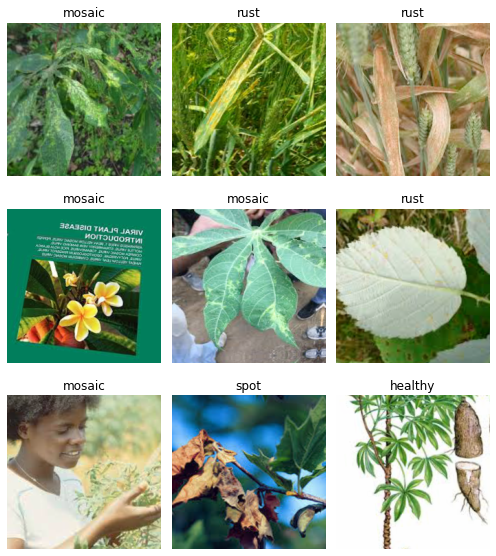

In [74]:
data.show_batch(rows=3, figsize=(7, 8))

In [75]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['healthy', 'mosaic', 'rust', 'spot'], 4, 447, 111)

In [80]:
learn = cnn_learner(data, models.resnet101, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/checkpoints/resnet101-5d3b4d8f.pth


In [81]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.139270,1.707227,0.378378,00:05
1,1.621635,1.513016,0.387387,00:05
2,1.267700,1.252170,0.324324,00:05
3,1.091144,1.216663,0.333333,00:05


In [82]:
learn.save('stage-1')
learn.unfreeze()
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


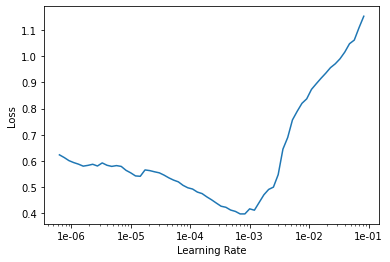

In [83]:
learn.recorder.plot()

In [84]:
learn.fit_one_cycle(3, max_lr=slice(4e-4, 9e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.693378,2.412391,0.333333,00:06
1,0.902358,2.847372,0.333333,00:06
2,0.861256,1.373574,0.225225,00:06


In [0]:
learn.save('stage-2')
learn.load('stage-2')

In [92]:
internp = ClassificationInterpretation.from_learner(learn)

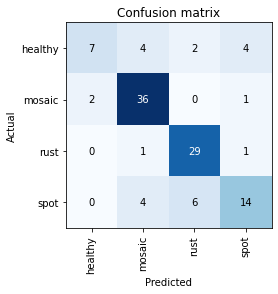

In [93]:
internp.plot_confusion_matrix()

In [0]:
from fastai.widgets import *

In [0]:
db = (ImageList.from_folder(path).split_none().label_from_folder().
      transform(get_transforms(), size=224)
      .databunch())

In [0]:
learn_cln = cnn_learner(db, models.resnet101, metrics=error_rate)
learn_cln.load('stage-2');

In [97]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [0]:
learn.export()

In [0]:
defaults.device = torch.device('cpu')
img = open_image(path/'mosaic'/'00000030.jpg')
img 

In [114]:
learn_to = load_learner(path)
pred_class, pred_idx, outputs = learn_to.predict(img)
pred_class

Category mosaic